In [ ]:
from nsepy import get_history
import datetime
from datetime import date
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from nsepy.derivatives import get_expiry_date
import mibian

data = get_history(symbol='RELIANCE',start=date(2020, 1, 1),end=date(2020, 7, 31))

In [ ]:
Reliance = pd.DataFrame(index=data.index)
Reliance['Close'] = data['Close']
strike_difference = 20
Reliance['ATM_Strike']  = np.round(data.Close/strike_difference, 0)*strike_difference
Reliance.index = pd.to_datetime(Reliance.index)
Reliance['month'] = Reliance.index.month
Reliance['year'] = Reliance.index.year
Reliance.head()

In [27]:
def expiry(df):
    try:
        return max(get_expiry_date(year=df.year, month=df.month))
    except:
        return np.NaN


Reliance['expiry_date'] = Reliance.apply(expiry, axis=1)
Reliance.head()

,Close,ATM_Strike,month,year,expiry_date
Date,,,,,
2019-01-01,1121.00,1120.0,1,2019,2019-01-31
2019-01-02,1106.40,1100.0,1,2019,2019-01-31
2019-01-03,1092.75,1100.0,1,2019,2019-01-31
2019-01-04,1098.65,1100.0,1,2019,2019-01-31
2019-01-07,1104.75,1100.0,1,2019,2019-01-31


In [34]:
def get_option_data(inst_name, start_date, end_date, option_type, 
                     strike_price, expiry_date):
        return get_history(symbol=inst_name,
                    start=start_date,
                    end=end_date,
                    option_type=option_type,
                    strike_price=strike_price,
                    expiry_date=expiry_date) 
                
    
def get_options_close(df):
    return get_option_data('RELIANCE', df.name, df.name, 'CE', 
                           df.ATM_Strike, df.expiry_date).Close.values


Reliance['options_close'] = Reliance.apply(get_options_close, axis=1)
Reliance.head()

,Close,ATM_Strike,month,year,expiry_date,options_close
Date,,,,,,
2019-01-01,1121.00,1120.0,1,2019,2019-01-31,[38.35]
2019-01-02,1106.40,1100.0,1,2019,2019-01-31,[39.9]
2019-01-03,1092.75,1100.0,1,2019,2019-01-31,[33.55]
2019-01-04,1098.65,1100.0,1,2019,2019-01-31,[36.65]
2019-01-07,1104.75,1100.0,1,2019,2019-01-31,[36.55]


In [35]:
Reliance['days_to_expiry'] = (Reliance.expiry_date - Reliance.index.date)

In [42]:
def call_iv(df):
    try:
        return mibian.BS([df.Close, df.ATM_Strike, 0.05, df.days_to_expiry.days], 
                         callPrice=df.options_close).impliedVolatility
    except:
        return np.nan
    

Reliance['call_iv'] = Reliance.apply(call_iv, axis=1)
Reliance.head()

,Close,ATM_Strike,month,year,expiry_date,options_close,days_to_expiry,call_iv
Date,,,,,,,,
2019-01-01,1121.00,1120.0,1,2019,2019-01-31,[38.35],30 days,29.525757
2019-01-02,1106.40,1100.0,1,2019,2019-01-31,[39.9],29 days,29.541016
2019-01-03,1092.75,1100.0,1,2019,2019-01-31,[33.55],28 days,30.586243
2019-01-04,1098.65,1100.0,1,2019,2019-01-31,[36.65],27 days,31.280518
2019-01-07,1104.75,1100.0,1,2019,2019-01-31,[36.55],24 days,30.250549


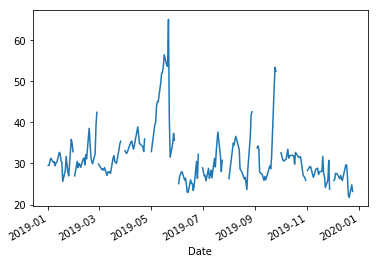

In [43]:
Reliance.call_iv.plot()
